#DATA LOADING

In [ ]:
import pandas as pd
import re as re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import spacy
import numpy as np


import matplotlib.pyplot as plt 
from matplotlib import rcParams
import seaborn as sns
from textblob import TextBlob
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot
%matplotlib inline
from wordcloud import WordCloud,STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from nltk.stem import WordNetLemmatizer 

from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_excel('/content/dataset_final.xlsx')

In [ ]:
df = pd.DataFrame.from_dict(data)
df=df.dropna()
print(df['label'].unique())

['negative' 'positive' 'p' 'negative ' 'positve']


In [ ]:
col=list(df)
for i in range(19456):
  if(df['label'][i]=='positive' or df['label'][i]=='positve' or df['label'][i]=='p'):
    df['label'][i]='positive'
  if(df['label'][i]=='negative' or df['label'][i]=='negative ' ):
    df['label'][i]='negative'

      
print(df['label'].unique())



['negative' 'positive']


In [ ]:
col=list(df)
for i in range(19456):
  if(df['label'][i]=='positive' or df['label'][i]=='positve' or df['label'][i]=='p'):
    df['label'][i]=1
  if(df['label'][i]=='negative' or df['label'][i]=='negative ' ):
    df['label'][i]=0

      
print(df['label'].unique())



[0 1]


In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

# cleaning , normalisation , lemmatisation

In [ ]:
lemmatizer = WordNetLemmatizer()
def review_cleaning(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    # normalisation
    text = str(text).lower()

    # cleaning 
    
    # remove not words and not space replace with empty string
    text=re.sub(r'[^\w\s]','',text)

    # remove line characters and sub it with empty
    text = re.sub('\n', '', text)

    #  remove words with digits in it.
    text = re.sub('\w*\d\w*', '', text)

    # remove all non word characters like (#,$, ^,etc) from the sentence using regex
    text= re.sub(r'[\W+]',' ',text)

    # lemmatising 
    #lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in text])
    return text
df['Reviews']=df['Reviews'].apply(lambda x:review_cleaning(x));

In [ ]:
print(df)

                                                 Reviews label
0      this phone is not unlocked so i can not use it...     0
1                                  great i recommend it      1
2      the worst purchase i ever made online the phon...     0
3      i can not connect to internet using mobile dat...     0
4                  excellent phone i stop using my note      1
...                                                  ...   ...
19451                          phone was great i love it     1
19452                       iphone had burned out atenna     0
19453                               exactly as described     1
19454  great phone and a really good price my husband...     1
19455                                          excellent     1

[19456 rows x 2 columns]


#stop words

In [ ]:
file_open = open("./stopwords.txt", "r")
sw = file_open.read()
stop_words = sw.split(", ")

In [ ]:
len(stop_words)

319

In [ ]:
df['Reviews'] = df['Reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

#data analysis

In [ ]:
print(df)

                                                 Reviews label
0                  phone unlocked use without unclocking     0
1                                        great recommend     1
2      worst purchase ever made online phone defected...     0
3      connect internet using mobile data using att s...     0
4                        excellent phone stop using note     1
...                                                  ...   ...
19451                                   phone great love     1
19452                               iphone burned atenna     0
19453                                  exactly described     1
19454  great phone really good price husband pleased ...     1
19455                                          excellent     1

[19456 rows x 2 columns]


In [ ]:

df['word_count'] = df['Reviews'].apply(lambda x: len(str(x).split()))


In [ ]:
print(df)

                                                 Reviews label  word_count
0              phone unlocked use without unclocking ...     0           6
1                                     Great, recommend !     1           3
2      worst purchase ever made online. phone defecte...     0          41
3      connect internet using mobile data. using AT&T...     0          14
4                     excellent phone. stop using Note 4     1           6
...                                                  ...   ...         ...
19451                                   Phone great love     1           3
19452                               iPhone burned atenna     0           3
19453                                  exactly described     1           2
19454  Great phone really good price. husband pleased...     1          26
19455                                          Excellent     1           1

[19456 rows x 3 columns]


In [ ]:
review_pos = df[df['label']==1].dropna()

In [ ]:
print(review_pos)

                                                 Reviews label  word_count
1                                     Great, recommend !     1           3
4                     excellent phone. stop using Note 4     1           6
5                                                   Good     1           1
6                                       Fits advertised.     1           2
7      worked great. We hooked straight talk service....     1          25
...                                                  ...   ...         ...
19448  4 plus year old model works expected. Good sol...     1          32
19451                                   Phone great love     1           3
19453                                  exactly described     1           2
19454  Great phone really good price. husband pleased...     1          26
19455                                          Excellent     1           1

[12569 rows x 3 columns]


In [ ]:
review_neg=df[df['label']==0].dropna()

In [ ]:
print(review_neg)

                                                 Reviews label  word_count
0              phone unlocked use without unclocking ...     0           6
2      worst purchase ever made online. phone defecte...     0          41
3      connect internet using mobile data. using AT&T...     0          14
8      Product good battery isnt good charge 100% go ...     0          11
10     Battery pretty much shot got it. Should bought...     0           9
...                                                  ...   ...         ...
19439  Simply put, phone work. brought Apple said new...     0          27
19444  sold device stopped working days. device began...     0          45
19449                 Just advertised. Arrived promptly.     0           4
19450    bought use "Tracfone" program. Very Successful!     0           6
19452                               iPhone burned atenna     0           3

[6887 rows x 3 columns]


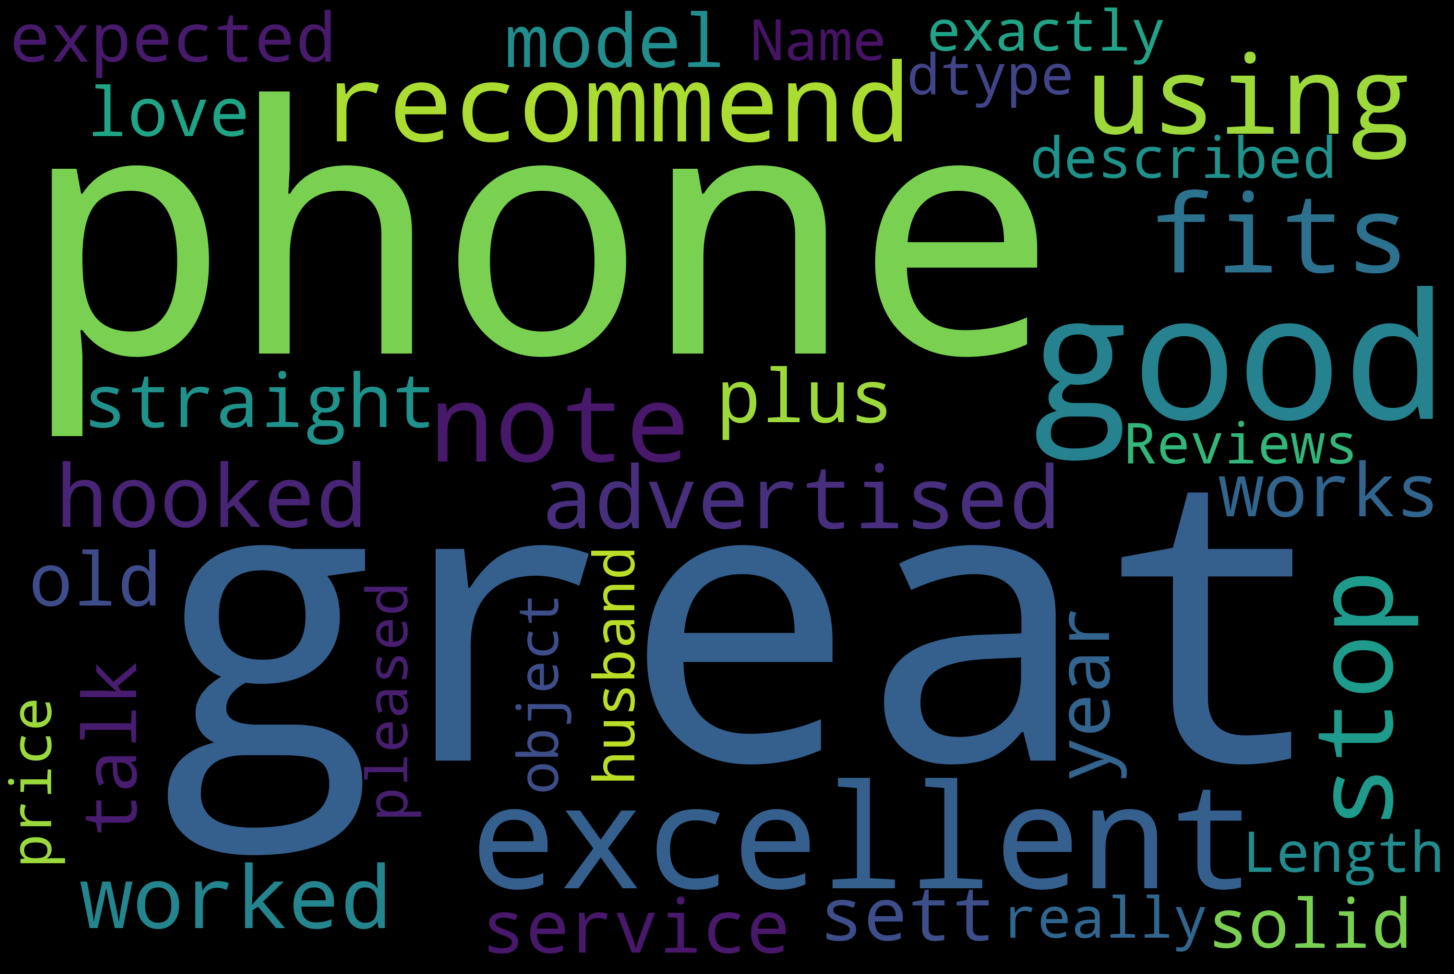

In [ ]:
text = review_pos["Reviews"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (20, 15),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

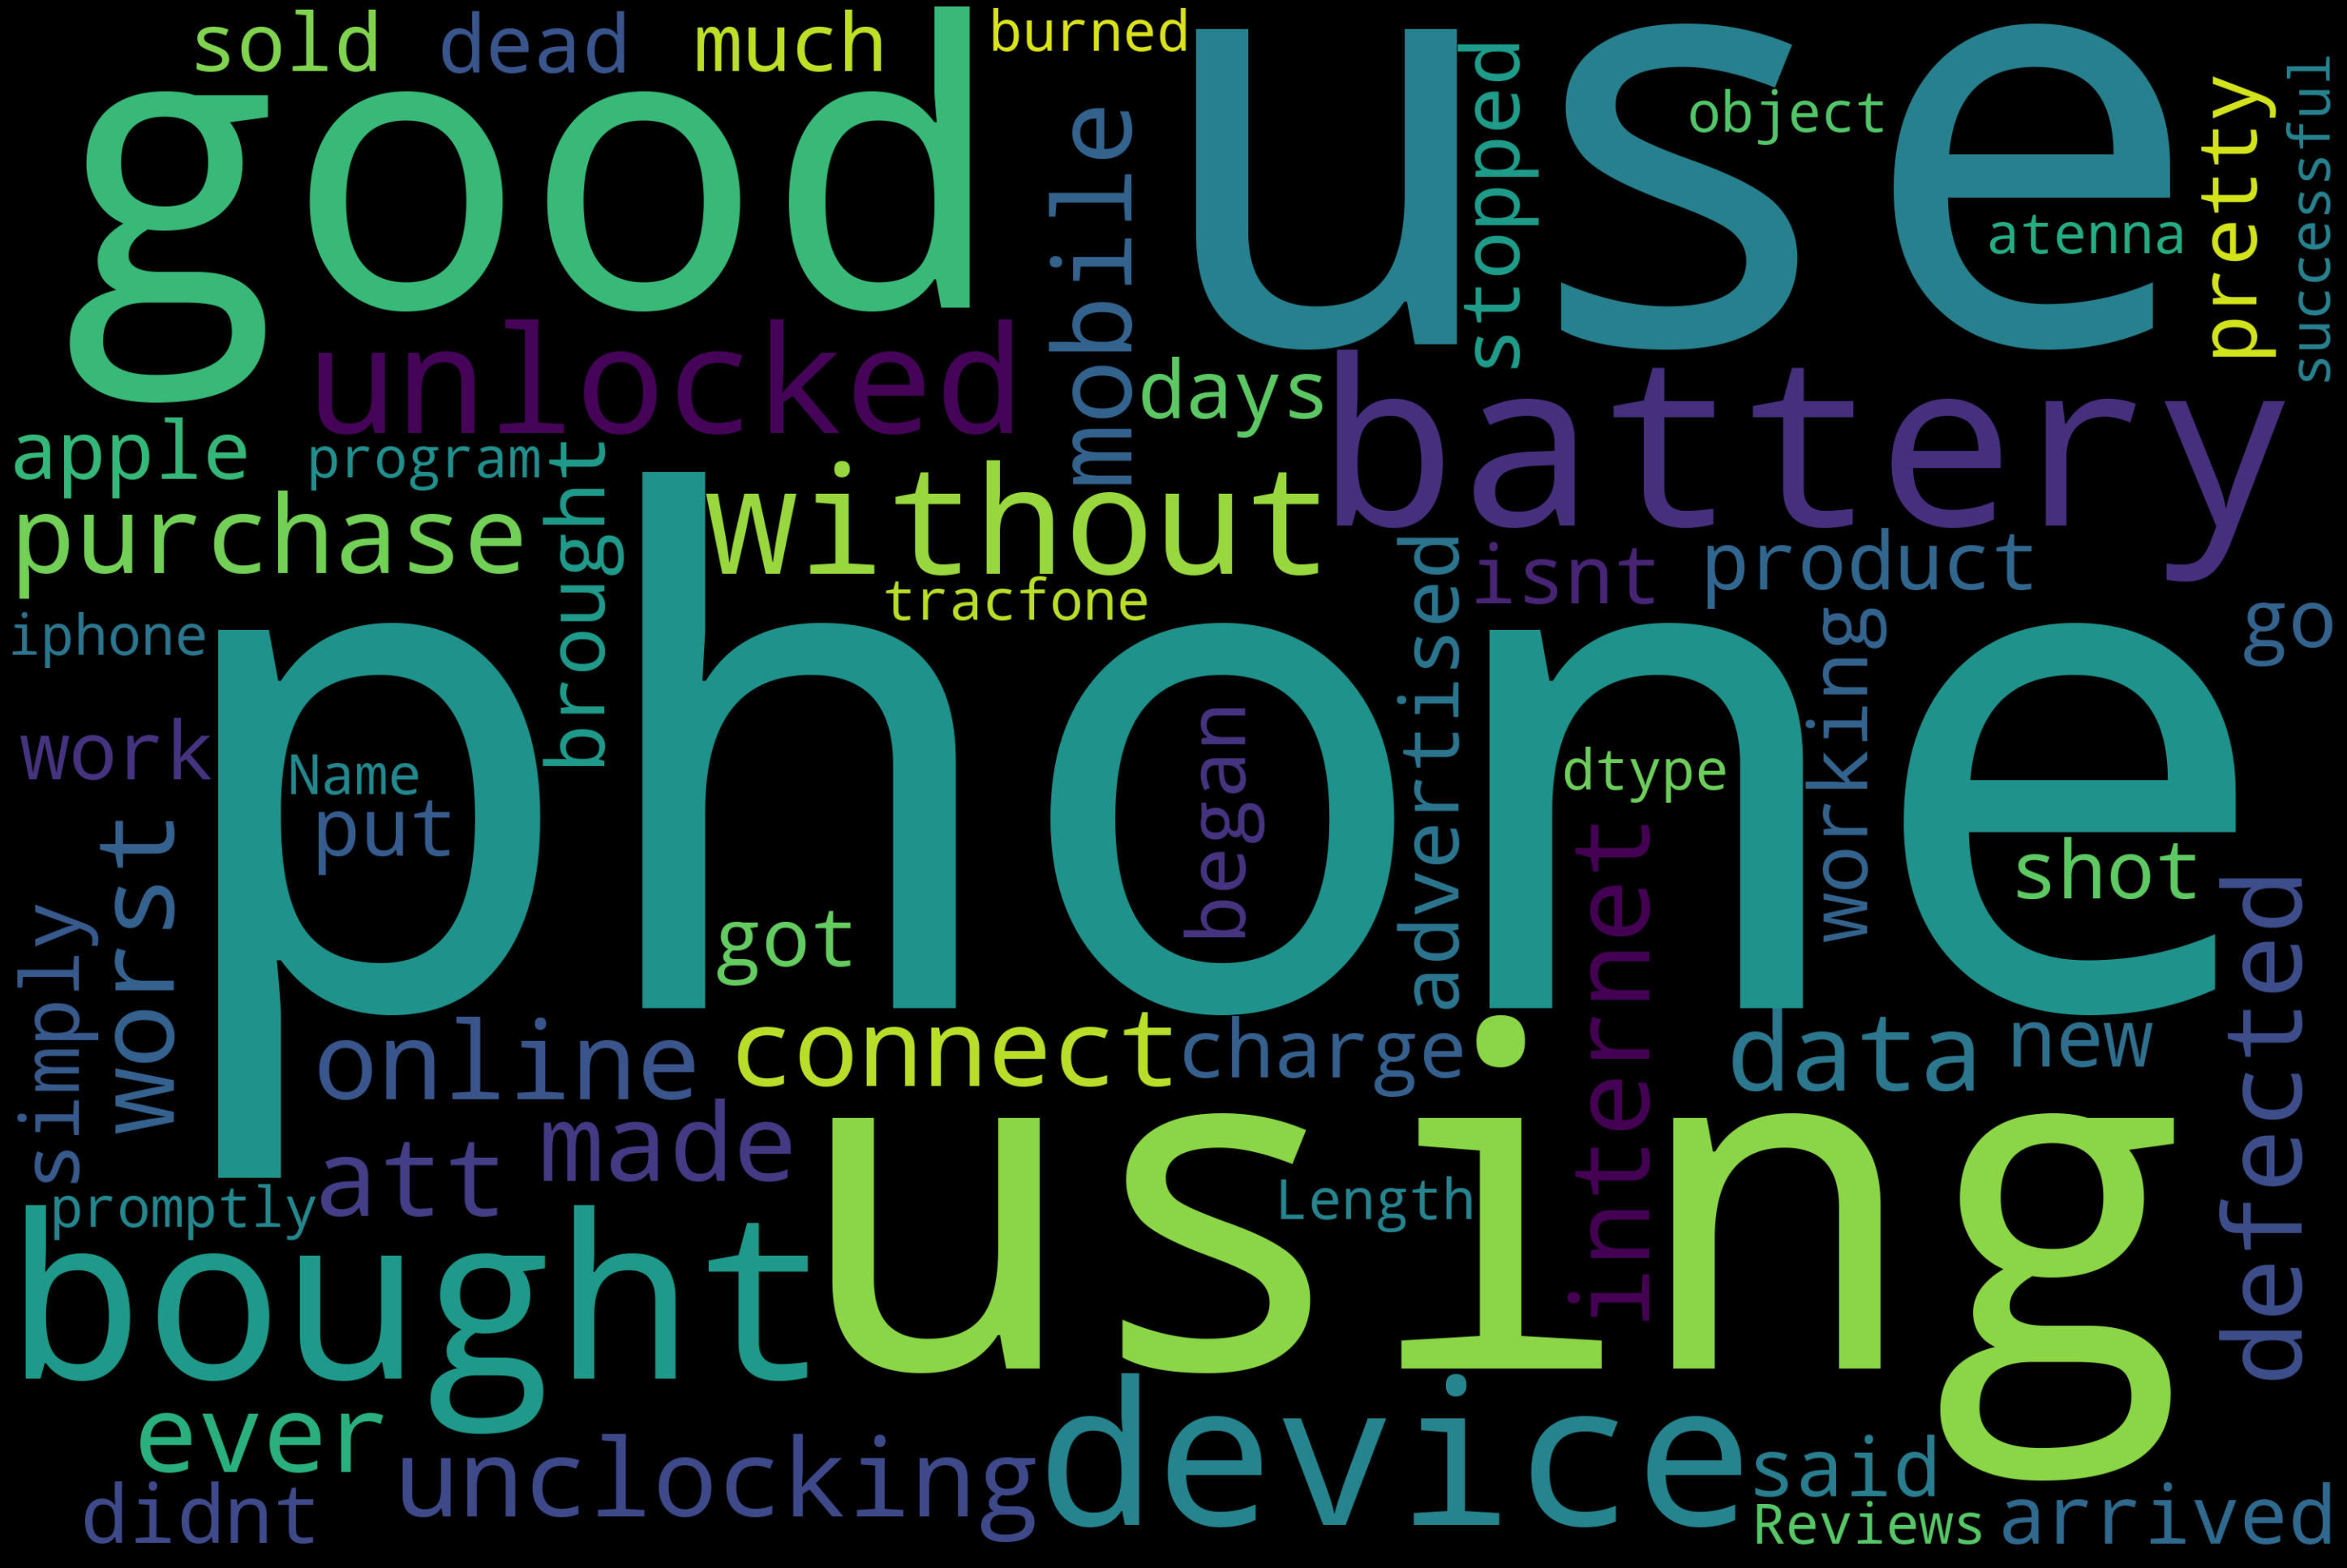

In [ ]:
text = review_neg["Reviews"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = stop_words).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#exp1

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(2,2))
# TF-IDF feature matrix
X= tfidf_vectorizer.fit_transform(df['Reviews'])

In [ ]:
print(X.shape)

(19456, 5000)


In [ ]:
Y=df['label']

In [ ]:
Y=list(Y)

In [ ]:
print(f'Original dataset shape : {Counter(Y)}')

## class weighting when unbaanced

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, Y)

print(f'Resampled dataset shape {Counter(y_res)}')

Original dataset shape : Counter({1: 12569, 0: 6887})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



Resampled dataset shape Counter({0: 12569, 1: 12569})


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=0)

In [ ]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(5, 4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    #plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.xlabel('Predicted label')
    plt.show()

In [ ]:
def print_metrices(pred,true):
    print(confusion_matrix(true,pred))
    print(classification_report(true,pred,))
    print("Accuracy : ",accuracy_score(pred,true))
    print("Precison : ",precision_score(pred,true, average = 'weighted'))
    print("Recall : ",recall_score(pred,true,  average = 'weighted'))
    print("F1 : ",f1_score(pred,true,  average = 'weighted'))

In [ ]:
X_train1=[]
X_test1=[]
pred=pipeline_pos.predict(X_train)
for i in range(len(pred)):
  tags=pred[i]
  rev=X_train[i]
  ref=""
  for j in range(len(tags)):
      ref=ref+" "+lemmatizer(rev[j],tags[j])
  X_train1.append(ref)
#NNS,NNP,VBZ,VB,VBN,"JJ","JJR","JJS",VBG
pred=pipeline_pos.predict(X_test)
for i in range(len(pred)):
  tags=pred[i]
  rev=X_test[i]
  ref=""
  for j in range(len(tags)):
      ref=ref+" "+lemmatizer(rev[j],tags[j])
  X_test1.append(ref)

Logistic Regression
test :
[[1683 1424]
 [1005 2173]]
              precision    recall  f1-score   support

           0       0.63      0.54      0.58      3107
           1       0.60      0.68      0.64      3178

    accuracy                           0.61      6285
   macro avg       0.62      0.61      0.61      6285
weighted avg       0.61      0.61      0.61      6285

Accuracy :  0.6135242641209229
Precison :  0.6229964838506398
Recall :  0.6135242641209229
F1 :  0.6155452793957865


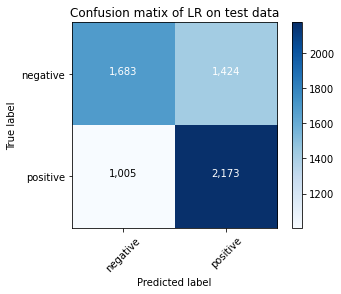

In [ ]:
import itertools

pipeline = Pipeline([
        #('bow', CountVectorizer()), 
        #('tfidf', TfidfTransformer()),  
        ('c', LogisticRegression())
    ])
fit = pipeline.fit(X_train1,y_train)
print('Logistic Regression')
print ('test :')
pred=pipeline.predict(X_test1)

print_metrices(pred,y_test)
plot_confusion_matrix(confusion_matrix(y_test,pred),target_names=['negative','positive'], normalize = False, \
                      title = 'Confusion matix of LR on test data')

#pos tagging

In [ ]:
fp=open('./postags.txt', 'r') 

In [ ]:
x=fp.read()

In [ ]:
y=x.split(",")

In [ ]:
len(y)

81976

In [ ]:
y

In [ ]:
X_train=[]
y_train=[]
for i in range(len(y)):
  try:
    d=y[i].split(" ")
    a=d[0]
    b=d[1]
    X_train.append(a)
    y_train.append(b)
  except:
    pass

In [ ]:
len(X_train),len(y_train)

(79300, 79300)

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function


In [ ]:
import itertools

In [ ]:
pipeline_pos = Pipeline([
        ('bow', CountVectorizer()), 
        ('tfidf', TfidfTransformer()),  
        ('c', DecisionTreeClassifier())
    ])
fit = pipeline_pos.fit(X_train,y_train)

In [ ]:
pred=pipeline_pos.predict(X_train[2:8])
print(X_train[2:8],pred)

['is', 'not', 'unlocked', 'so', 'I', 'can'] ['VBZ' 'RB' 'JJ' 'RB' 'DT' 'MD']


#lemmatizer


In [ ]:
def lemmatizer(word,pos):
  if word[-3:]=='ing':
    if pos=="VBG":
      return word[:len(word)-3]
    else:
      return word
  if word in ["is","was","were"]:
    return "be"
  if pos in ["VBN"]:
    if word[-2:]=="en":
      return word[:len(word)-1]
    if word[-2:]=="ed":
      return word[:len(word)-1]
    else:
      return word  
  if pos in ["JJ","JJR","JJS"]:
    if word[-2:]=='ed':
        return word
    if word[-2:]=='er':
      return word[:len(word)-2]
    if word[-2:]=='est':
      return word[:len(word)-3]
    else:
      return word
  if pos=="VB":
    return word
  if pos=='VBZ':
    if word[-1:]=='s':
      return word[:len(word)-1]
    else:
      return word
  if pos=='NNP':
    return word
  
  if pos=="NNS":
    if word.endswith('s'):
          if len(word) > 3:
              #Leaves, wives, thieves
              if word.endswith('ves'):
                  if len(word[:-3]) > 2:
                      return word.replace('ves','f')
                  else:
                      return word.replace('ves','fe')
              #Parties, stories
              if word.endswith('ies'):
                  return word.replace('ies','y')
              #Tomatoes, echoes
              if word.endswith('es'):
                  if word.endswith('ses') and word[-4] in ['a','e','i','o','u']:
                      return word[:-1]
                  if word.endswith('zzes'):
                      return word.replace('zzes','z')
                  return word[:-2]
              if word.endswith('ys'):
                  return word.replace('ys','y')
              return word[:-1]  

    else:
      return word

  else:
      return word

In [ ]:
print(lemmatizer("turning","VBG"))

turn


In [ ]:
print(lemmatizer("worked","VBD"))

work


In [ ]:
print(lemmatizer("Stories","NN"))

Story


In [ ]:
print(lemmatizer("cars","NN"))

car


In [ ]:
print(lemmatizer("were","VBD"))

be


In [ ]:
print(lemmatizer("great","JJ"))

great


#exp2

In [ ]:
Y=df['label']

In [ ]:
Y=list(Y)

In [ ]:
len(Y)

19456

In [ ]:
X_train[0].split(" ")[0]

'phone'

In [ ]:
X_train1=[]
X_test1=[]
Y_train1=[]
Y_test1=[]

X_train=list(df['Reviews'])[:18853]
y_train=Y[:18853]
X_test=list(df['Reviews'])[18853:]
y_test=Y[18853:]
pred=[]
for i in X_train:
  d=[]
  for j in i.split():
    d.append(pipeline_pos.predict([j]))  
  pred.append(d)
for i in range(len(pred)):
  tags=pred[i]
  rev=X_train[i]
  ref=""
  for j in range(len(tags)):
    if tags[j] in ['NNS','NNP','VBZ','VB','VBN',"JJ","JJR","JJS",'VBG']:
      ref=ref+" "+lemmatizer(str(rev[j]),list(tags[j])[0])
  #print("refv: ",ref)
  if len(ref)!=0:
    X_train1.append(ref)
    Y_train1.append(y_train[i])
#NNS,NNP,VBZ,VB,VBN,"JJ","JJR","JJS",VBG
pred=[]
for i in X_test:
  d=[]
  for j in i.split():
    d.append(pipeline_pos.predict([j]))  
  pred.append(d)

for i in range(len(pred)):
  tags=pred[i]
  rev=X_test[i]
  ref=""
  for j in range(len(tags)):
    if tags[j] in ['NNS','NNP','VBZ','VB','VBN',"JJ","JJR","JJS",'VBG']:
      ref=ref+" "+lemmatizer(str(rev[j]),list(tags[j])[0])
  if len(ref)!=0:
    X_test1.append(ref)
    Y_test1.append(y_test[i])

In [ ]:
lemmatizer("glasses","NNS")

'glass'

In [ ]:
for i in range(len(pred)):
  tags=pred[i]
  rev=X_train[i].split()
  ref=""
  #print(tags)
  #print(rev)
  for j in range(len(tags)):
    if tags[j] in ['NNS','NNP','VBZ','VB','VBN',"JJ","JJR","JJS",'VBG']:
      print(list(tags[j])[0],str(rev[j]))
      ref=ref+" "+lemmatizer(rev[j],list(tags[j])[0])
  #print("refv: ",ref)
  if len(ref)!=0:
    X_train1.append(ref)
    Y_train1.append(y_train[i])


In [ ]:
len(X_train1)

17666

In [ ]:
for i in range(len(pred)):
  tags=pred[i]
  rev=X_test[i].split()
  ref=""
  for j in range(len(tags)):
    if tags[j] in ['NNS','NNP','VBZ','VB','VBN',"JJ","JJR","JJS",'VBG']:
      print(list(tags[j])[0],str(rev[j]))
      ref=ref+" "+lemmatizer(str(rev[j]),list(tags[j])[0])
  if len(ref)!=0:
    X_test1.append(ref)
    Y_test1.append(y_test[i])

In [ ]:
len(X_test1)

644

In [ ]:
def print_metrices(pred,true):
    print("Accuracy : ",accuracy_score(pred,true))
    print("F1 : ",f1_score(pred,true,  average = 'weighted'))

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(2,2))
# TF-IDF feature matrix
X_TO=X_train1
for i in X_test1:
  X_TO.append(i)
X_tr= tfidf_vectorizer.fit_transform(X_TO)
#X_te=tfidf_vectorizer.fit_transform(X_test1)

In [ ]:
Y_TO=Y_train1
for i in Y_test1:
  Y_TO.append(i)

In [ ]:
len(X_TO),len(Y_TO)

(18310, 18310)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_TO, Y_TO, test_size=0.25, random_state=0)

In [ ]:
import itertools

pipeline = Pipeline([
        ('bow', CountVectorizer()), 
        ('tfidf', TfidfTransformer()),  
        ('c', LogisticRegression())
    ])
fit = pipeline.fit(X_train,y_train)
pred=pipeline.predict(X_test)
print_metrices(pred,y_test)


Accuracy :  0.6382699868938401
F1 :  0.7036547503014313


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
#print(lemmatizer("cars","NN"))

#rough


In [ ]:
print(X_train)

  (0, 115)	0.3739431595819592
  (0, 3189)	0.38680325852925423
  (0, 3773)	0.4216324063771659
  (0, 4412)	0.4260045400287434
  (0, 984)	0.34892785445223595
  (0, 985)	0.41388666785418365
  (0, 2340)	0.24133623209214053
  (1, 1593)	1.0
  (2, 1681)	0.7299442131243545
  (2, 383)	0.6835067269063755
  (3, 2281)	0.43725577024455536
  (3, 2800)	0.4712063249091297
  (3, 3715)	0.38030917041366746
  (3, 4439)	0.42120975737697286
  (3, 3084)	0.4011551514465743
  (3, 4952)	0.3221704679374699
  (4, 1326)	0.565410931100992
  (4, 2257)	0.5080432311826887
  (4, 4306)	0.565410931100992
  (5, 1107)	0.3359873476402008
  (5, 1762)	0.32295341642906494
  (5, 1994)	0.5058756345478734
  (5, 2339)	0.408595855557076
  (5, 2592)	0.3573179206462174
  (5, 4517)	0.48195099939716773
  :	:
  (18845, 1065)	0.9598339672150435
  (18845, 1972)	0.048597300690157
  (18845, 2225)	0.05339113320567124
  (18846, 1782)	0.45598255396674386
  (18846, 4463)	0.45191663045928293
  (18846, 189)	0.39713248611912044
  (18846, 755)	0.448

In [ ]:
print(y_train.shape)

(18853,)
